In [1]:
import json
import pandas as pd
import numpy as np
import os
import gzip
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_year_news = pd.read_parquet('C:/Users/hladn/FAKS/Magistrsko delo/data/eventregistry/df_news_2020.parquet.gzip')
df_year_news

,body,media,title,date
0,"Ljubljana, 01. januarja (STA) - Vstopili smo v...",Slovenska tiskovna agencija STA,Več desettisoč ljudi novo leto pričakalo na pr...,2020-01-01
1,Številna slovenska večja in manjša mesta že tr...,MMC RTV Slovenija,V Sloveniji številni na prostem pričakali novo...,2020-01-01
2,Zmago Jelinčič Plemeniti je resnično plemenit ...,Časnik.si - Spletni magazin z mero,"Šarec in Jelinčič ljubita Srbe, vohunstvo in k...",2020-01-01
3,Ob vstopu v novo leto je nebo nad Ljutomerom r...,Prlekija-on.net,Vstopili smo v leto 2020. Srečno!,2020-01-01
4,Vstopili smo v leto 2020. Številni so novo let...,Tednik Demokracija,Več desettisoč ljudi novo leto pričakalo na pr...,2020-01-01
...,...,...,...,...
450420,V ZDA se je do ponedeljka večer z novim korona...,PortalPolitikis,V ZDA s koronavirusom okuženih več kot 164.000...,2020-03-31
450421,"""Na začetku mislim, da smo vsi vse skupaj malc...",MMC RTV Slovenija,"Samir Handanović doma karta, igra šah, bere kn...",2020-03-31
450422,Idrija - Območje krajinskega parka Zgornja Idr...,Delo,Krajinski park vendarle dobil upravljavca,2020-03-31
450423,"Singapur, 31. marca (STA) - Cene nafte so se v...",Slovenska tiskovna agencija STA,Cene nafte nekoliko okrevale,2020-03-31


In [3]:
df_year_news = pd.read_parquet('/home/jhladnik/data/eventregistry/df_news_2021.parquet.gzip')
df_year_news

,body,media,title,date
0,Portorož (MOREL)- Občina Piran je v sodelovanj...,Morel,\n 1\n ...,2021-12-16
1,Letošnja velika rast cen električne energije i...,preberi.si,Energetika.NET: Skok cen energije tudi v Slove...,2021-12-16
2,"Dave Mustaine, šef skupine Megadeth in podjetj...",Rockline.si,Dave Mustaine (Megadeth) in podjetje Gibson pr...,2021-12-16
3,Zadnja polfinalna vozovnica na svetovnem prven...,ROKOMET.net,Zadnja polfinalna vozovnica pripadla Francozin...,2021-12-16
4,Opozorila\n\nRegionalna cesta Slovenski Javorn...,Gnes Dnevne Novice,"Prometno poročilo, četrtek 16.december 2021 ob...",2021-12-16
...,...,...,...,...
1103797,Digitalna medijska agencija Httpool je na leto...,Marketing magazin,Agencija Httpool je osvojila priznanje LinkedI...,2021-03-28
1103798,Združenje evropskih mestnih turističnih in kon...,Marketing magazin,Petra Stušek na čelu združenja European Cities...,2021-03-28
1103799,Smo v tretjem valu epidemije. Najbolj obremenj...,vestnik.si,Polni žepi koronskih dodatkov: razkrivamo najv...,2021-03-28
1103800,Čakalna doba je na mejnih prehodih Obrežje in ...,Gnes Dnevne Novice,"Prometno poročilo, ponedeljek 29.marec 2021 ob...",2021-03-28


In [6]:
stats = pd.read_csv('/home/jhladnik/data/eventregistry/event_registry_stats.tsv', sep='\t')

In [8]:
stats[:20]

,source_uri,2014,2015,2016,2017,2018,2019,2020,total
0,siol.net,0,0,11907,22344,28098,25997,23968,112314
1,24ur.com,11825,13113,15560,15495,7607,18838,21293,103731
2,dnevnik.si,21626,4931,853,19384,24592,21143,15400,107929
3,financnitrgi.com,0,0,358,707,553,300,253,2171
4,gorenjskiglas.si,55,4410,6819,6791,7002,7162,7888,40127
5,rtvslo.si,13087,8423,31076,30288,33125,30691,35731,182421
6,vecer.com,292,7293,9009,16464,24546,16288,17054,90946
7,delo.si,29155,32762,32201,27613,12880,22367,22765,179743
8,svet24.si,0,0,8660,10594,0,0,0,19254
9,sta.si,16960,74108,93570,98490,96383,91605,101060,572176


In [80]:
df_year_news['date']= pd.to_datetime(df_year_news['date'])
df_year_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450425 entries, 0 to 450424
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   body    450425 non-null  object        
 1   media   450425 non-null  object        
 2   title   450425 non-null  object        
 3   date    450425 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 13.7+ MB


In [66]:
df_year_news_count = df_year_news[['media', 'title']].groupby(['media']).count().reset_index()
df_year_news_count = df_year_news_count.rename(columns={"title": "counts"})
df_year_news_count

,media,counts
0,194.249.67.10,1
1,24sata,6
2,24ur.com,21293
3,7Plus Regionalni Tjednik,1
4,7dni.pozareport.si,21
...,...,...
174,Šivalni stroji - podajte se v čudovit svet ust...,17
175,Športni Dnevnik Ekipa,12302
176,Žurnal24,18082
177,🍃 Metina lista,128


C:\Users\hladn\miniconda3\envs\mag\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128251 (\N{RADIO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hladn\miniconda3\envs\mag\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127811 (\N{LEAF FLUTTERING IN WIND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


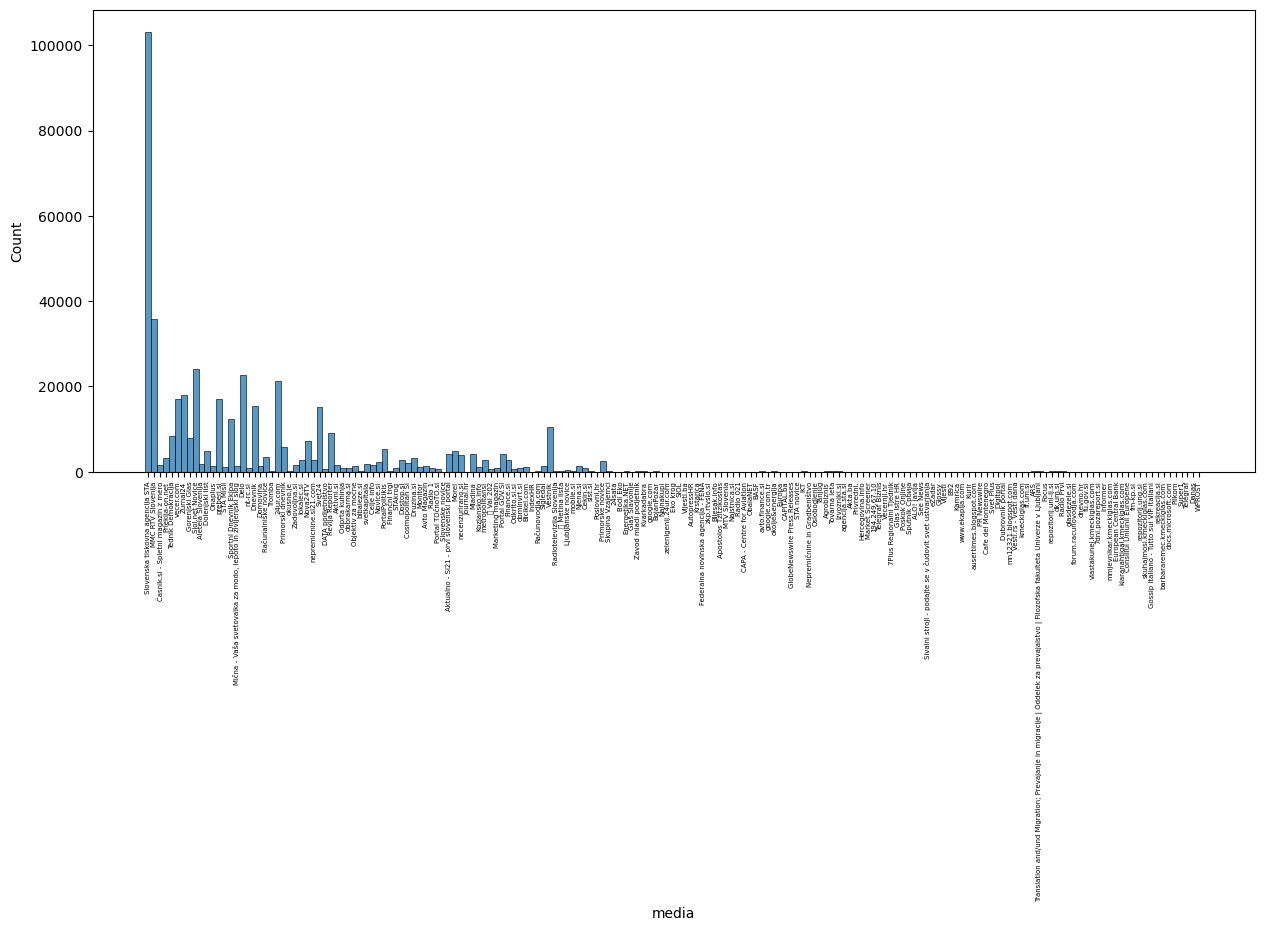

In [69]:
fig, axes = plt.subplots( figsize=(15, 6))
#axes[0].plot(deltas, variances,  color = 'b', lw=1)
#axes[0].set_xlabel('delta')
#axes[0].set_ylabel('variance')
#axes[1].plot(deltas, avg_rejection_rate,  color = 'r', lw=1)
#axes[1].set_xlabel('delta')
#axes[1].set_ylabel('rejection rate')
sns.histplot(data=df_year_news, x="media", ax = axes)
axes.tick_params(axis='x', rotation=90, labelsize=5)

#plt.savefig("MH_best_delta.png", format='png', dpi=150, bbox_inches='tight')
plt.show(sns)


In [71]:
df_year_news['date'].nunique()

366

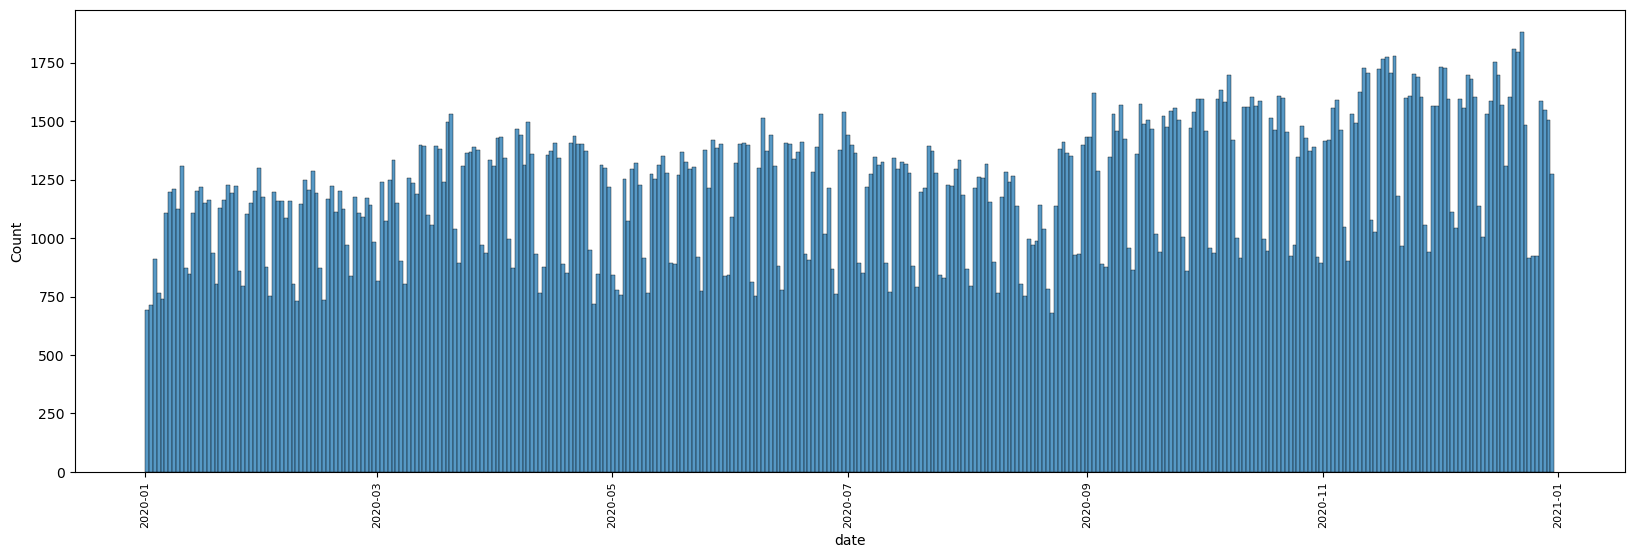

In [83]:
fig, axes = plt.subplots( figsize=(20, 6))
#axes[0].plot(deltas, variances,  color = 'b', lw=1)
#axes[0].set_xlabel('delta')
#axes[0].set_ylabel('variance')
#axes[1].plot(deltas, avg_rejection_rate,  color = 'r', lw=1)
#axes[1].set_xlabel('delta')
#axes[1].set_ylabel('rejection rate')
sns.histplot(data=df_year_news, x="date", ax = axes, bins = 366)
axes.tick_params(axis='x', rotation=90, labelsize=8)

#plt.savefig("MH_best_delta.png", format='png', dpi=150, bbox_inches='tight')
plt.show(sns)

## classla experiments

In [ ]:
config = {
    # Comma-separated list of processors to use
    'processors': 'tokenize, pos, lemma',
    'lang': 'sl',  # Language code for the language to build the Pipeline in
    # Use pretokenized text as input and disable tokenization
    'tokenize_pretokenized': False,
    'use_gpu': True,
    # initialize the default non-standard Slovenian pipeline, use hr for Croatian and sr for Serbian
    'type': 'nonstandard'
}
nlp = classla.Pipeline(**config)


2022-10-02 17:08:16 INFO: Loading these models for language: sl (Slovenian):
| Processor | Package     |
---------------------------
| tokenize  | nonstandard |
| pos       | nonstandard |
| lemma     | nonstandard |

2022-10-02 17:08:16 INFO: Use device: cpu
2022-10-02 17:08:16 INFO: Loading: tokenize
2022-10-02 17:08:16 INFO: Loading: pos
2022-10-02 17:08:18 INFO: Loading: lemma
2022-10-02 17:08:20 INFO: Done loading processors!


In [ ]:
text_longer = "Tekmovanje za modri trak se je januarja že začelo na polmaratonu v italijanskem Škocjanu ob Soči, drugi del bo aprila na istrskem maratonu, sledita še bovški in goriški maraton. organizatorji bovškega maratona so podpisali pogodbo o sodelovanju z lokalnim podjetjem mines ki se ukvarja s proizvodnjo vodovodnih izdelkov njihov vodilni program so sanitarne armature blizt e pred tem je bilo podjetje eno izmed glavnih sponzorjev z omenjeno pogodbo pa je postalo generalni pokrovitelj s podpisom večletne pogodbe o generalnem pokroviteljstvu se je prireditev preimenovala v blitz bovec maraton za sodelovanje so se v podjetju mines odločili saj želijo s tem pomagati lokalni skupnosti direktor matej klavora po drugi strani je to dosti mednarodno pomemben dogodek in tudi z vidika naše blagovne znamke sigurno nam lahko kaj pripomore glede prepoznavnosti predsednik portnega društva bovec maraton vasja vitez pa je o sodelovanju povedal verjamem da bo to res doprineslo dobre rezultate in še večje število udeležencev na bovec maratonu priprave na maraton so se začele v februarju takrat so se začeli pogovarjati o ureditvi tras na katerih bodo letos tudi blitz točke mi se ukvarjamo s proizvodnjo armatur tako da bomo postavili dve taki točki kjer bodo fizično tuši in se bodo tekmovalci lahko tudi stuširali med tekom nam je pojasnil matej klavora novost letošnjega maratona je pokalno tekmovanje za modri trak ki bo povezalo štiri polmaratone na slovenski in italijanski strani tekmuje se med italijani in slovenci tako da v moški konkurenci šteje prvih šest italijanov in šest slovencev v ženski pa tri ženske na naši strani in tri na sosednji zanimivo je da lahko tudi vsi posamezniki tekmujejo morajo imeti pa vsaj tri udeležbe na tekmovanjih nam je razložil vasja vitez tekmovanje za modri trak se je januarja že začelo na polmaratonu v italijanskem kocjanu ob soči drugi del bo aprila na istrskem maratonu sledita še bovški in goriški maraton"


In [ ]:
% % time
for i in range(200):
    doc = nlp(text_longer)     # run the pipeline


CPU times: total: 9min 1s
Wall time: 1min 30s


In [ ]:
df_200 = df.sample(200)


In [ ]:
% % time
df_200['preprocessed_text'].apply(classla_preprocess, args=(stop_words, nlp))


CPU times: total: 8min 27s
Wall time: 1min 25s


33029     [negotovost, kdaj, lahko, vrniti, teren, povzr...
169792    [protestnik, zahtevati, odstop, vlada, Džazira...
325416    [ameriški, različica, britanski, televizijski,...
405613    [predčasen, volitev, odstotek, vprašan, voliti...
10120     [zanimiv, lahko, dojemanje, avtomobilski, znam...
                                ...                        
368760    [televizija, Slovenija, poročati, neuraden, in...
212217    [relativno, miren, etapa, pričakovanje, končat...
79539     [človek, covid, hospitaliziran, intenziven, ne...
356927    [šprint, kontiolahtij, dober, slovenski, biatl...
162755    [družba, news, corporation, ustanoviti, danes,...
Name: preprocessed_text, Length: 200, dtype: object

In [ ]:
# initialize the default non-standard Slovenian pipeline, use hr for Croatian and sr for Serbian
nlp = classla.Pipeline('sl', type='nonstandard')
doc = nlp("kva smo mi zural zadn let v zagrebu...")     # run the pipeline
print(doc.to_conll())


2022-10-02 16:33:48 INFO: Loading these models for language: sl (Slovenian):
| Processor | Package     |
---------------------------
| tokenize  | nonstandard |
| pos       | nonstandard |
| lemma     | nonstandard |
| depparse  | standard    |
| ner       | nonstandard |

2022-10-02 16:33:48 INFO: Use device: cpu
2022-10-02 16:33:48 INFO: Loading: tokenize
2022-10-02 16:33:48 INFO: Loading: pos
2022-10-02 16:33:49 INFO: Loading: lemma
2022-10-02 16:33:51 INFO: Loading: depparse
2022-10-02 16:33:52 INFO: Loading: ner
2022-10-02 16:33:52 INFO: Done loading processors!


# newpar id = 1
# sent_id = 1.1
# text = kva smo mi zural zadn let v zagrebu...
1	kva	kaj	PRON	Pq-nsa	Case=Acc|Gender=Neut|Number=Sing|PronType=Int	4	obj	_	NER=O
2	smo	biti	AUX	Va-r1p-n	Mood=Ind|Number=Plur|Person=1|Polarity=Pos|Tense=Pres|VerbForm=Fin	4	aux	_	NER=O
3	mi	jaz	PRON	Pp1-sd--y	Case=Dat|Number=Plur|Person=1|PronType=Prs|Variant=Short	4	iobj	_	NER=O
4	zural	zurati	VERB	Vmep-pm	Aspect=Perf|Gender=Masc|Number=Plur|VerbForm=Part	0	root	_	NER=O
5	zadn	zadnji	ADJ	Agpnsa	Case=Acc|Degree=Pos|Gender=Masc|Number=Sing	6	amod	_	NER=O
6	let	leto	NOUN	Ncnsa	Case=Acc|Gender=Neut|Number=Sing	4	obl	_	NER=O
7	v	v	ADP	Sl	Case=Loc	8	case	_	NER=O
8	zagrebu	Zagreb	PROPN	Npmsl	Case=Loc|Gender=Masc|Number=Sing	4	obl	_	NER=B-LOC|SpaceAfter=No
9	...	...	PUNCT	Z	_	4	punct	_	NER=O


